In [1]:
import os
import sys
sys.path.append(os.path.abspath(".."))

In [2]:
import torch
import seaborn as sns
import ristretto.activations as ra
import ristretto.models as rm
import ristretto.utils as ru
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
# from torch.utils.tensorboard import SummaryWriter

In [3]:
# set pytorch precision
torch.set_default_tensor_type(torch.FloatTensor)
torch.set_default_dtype(torch.float32)

In [4]:
# activate 
ra.ReLUFunction.print_when_zero = True

In [5]:
models = [
    rm.FullyConnected(activation=partial(ra.ReLU, 0), hidden_dims=[2000], seed=42069),
    rm.FullyConnected(activation=partial(ra.ReLU, 0), hidden_dims=[2000], seed=42069),
    rm.FullyConnected(activation=partial(ra.ReLU, 1), hidden_dims=[2000], seed=42069)
]

In [6]:
epochs = 2
metrics = ru.train_multiple_models(
    models,
    ru.default.DATA_LOADERS['MNIST'],
    epochs=epochs,
    metrics_fn=lambda m, p, y: {"weight_sum": ru.get_weight_sum(m)}
)

===== Model 1 (FullyConnected) =====
---------- Epoch 1 ----------
Found 1 item with input == 0
Found 1 item with input == 0
Validation
    loss:     1.421e-01
    accuracy: 95.45
---------- Epoch 2 ----------
Found 1 item with input == 0
Validation
    loss:     1.204e-01
    accuracy: 95.94

===== Model 2 (FullyConnected) =====
---------- Epoch 1 ----------
Found 1 item with input == 0
Found 1 item with input == 0
Validation
    loss:     1.421e-01
    accuracy: 95.45
---------- Epoch 2 ----------
Found 1 item with input == 0
Validation
    loss:     1.204e-01
    accuracy: 95.94

===== Model 3 (FullyConnected) =====
---------- Epoch 1 ----------
Found 1 item with input == 0
Found 1 item with input == 0
Validation
    loss:     1.460e-01
    accuracy: 95.28
---------- Epoch 2 ----------
Found 1 item with input == 0
Found 1 item with input == 0
Validation
    loss:     1.154e-01
    accuracy: 96.12



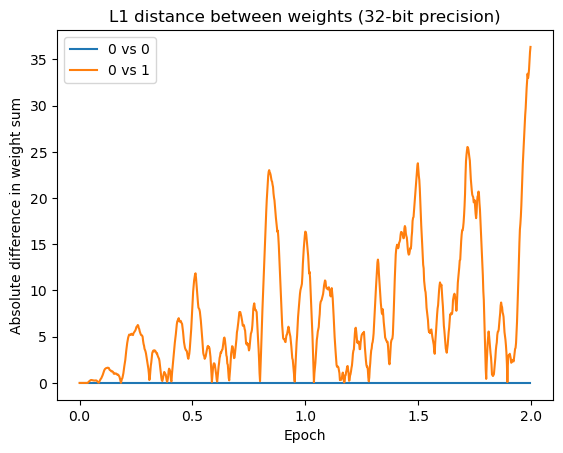

In [7]:
diff = pd.DataFrame({
    "0 vs 0": np.abs(metrics[0]["train"]['weight_sum'] - metrics[1]["train"]['weight_sum']),
    "0 vs 1": np.abs(metrics[0]["train"]['weight_sum'] - metrics[2]["train"]['weight_sum'])
})
sns.lineplot(data=diff, dashes=False)
plt.xticks(np.arange(2 * epochs + 1) / 4 * diff.shape[0], np.arange(0, epochs + 0.5, 0.5))
plt.xlabel("Epoch")
plt.ylabel("Absolute difference in weight sum")
plt.title("L1 distance between weights (32-bit precision)");

### When trained with 16-bit precision the difference between the models is even greater

In [8]:
# set pytorch precision
torch.set_default_tensor_type(torch.FloatTensor)
torch.set_default_dtype(torch.bfloat16)

In [9]:
models = [
    rm.FullyConnected(activation=partial(ra.ReLU, 0), hidden_dims=[2000], seed=42069),
    rm.FullyConnected(activation=partial(ra.ReLU, 0), hidden_dims=[2000], seed=42069),
    rm.FullyConnected(activation=partial(ra.ReLU, 1), hidden_dims=[2000], seed=42069)
]

In [10]:
epochs = 2
metrics = ru.train_multiple_models(
    models,
    ru.default.DATA_LOADERS['MNIST'],
    epochs=2,
    metrics_fn=lambda m, p, y: {"weight_sum": ru.get_weight_sum(m)}
)

===== Model 1 (FullyConnected) =====
---------- Epoch 1 ----------
Found 1 item with input == 0
Found 1 item with input == 0
Found 1 item with input == 0
Found 1 item with input == 0
Validation
    loss:     1.288e-01
    accuracy: 96.08
---------- Epoch 2 ----------
Found 1 item with input == 0
Validation
    loss:     9.003e-02
    accuracy: 97.15

===== Model 2 (FullyConnected) =====
---------- Epoch 1 ----------
Found 1 item with input == 0
Found 1 item with input == 0
Found 1 item with input == 0
Found 1 item with input == 0
Validation
    loss:     1.288e-01
    accuracy: 96.08
---------- Epoch 2 ----------
Found 1 item with input == 0
Validation
    loss:     9.003e-02
    accuracy: 97.15

===== Model 3 (FullyConnected) =====
---------- Epoch 1 ----------
Found 1 item with input == 0
Validation
    loss:     1.289e-01
    accuracy: 96.04
---------- Epoch 2 ----------
Found 1 item with input == 0
Validation
    loss:     8.991e-02
    accuracy: 97.16



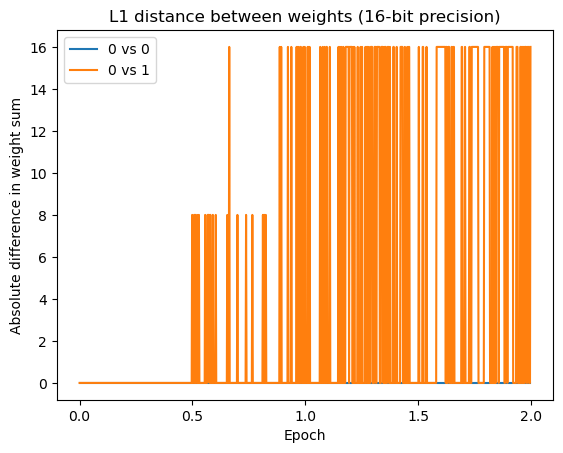

In [11]:
diff = pd.DataFrame({
    "0 vs 0": np.abs(metrics[0]["train"]['weight_sum'] - metrics[1]["train"]['weight_sum']),
    "0 vs 1": np.abs(metrics[0]["train"]['weight_sum'] - metrics[2]["train"]['weight_sum'])
})
sns.lineplot(data=diff, dashes=False)
plt.xticks(np.arange(2 * epochs + 1) / 4 * diff.shape[0], np.arange(0, epochs + 0.5, 0.5))
plt.xlabel("Epoch")
plt.ylabel("Absolute difference in weight sum")
plt.title("L1 distance between weights (16-bit precision)");